In [1]:

#@ INITIALIZATION: 
#enables automatic reloading of Python modules that are imported into the notebook, 
#so that any changes made to the module are automatically reloaded without having to restart the kernel.
%reload_ext autoreload
#display Matplotlib graphs and charts directly in the notebook, rather than in a separate window.
%matplotlib inline


#!conda install pyarrow
#!pip install pydicom kornia opencv-python scikit-image nbdev

In [2]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom

import pandas as pd

In [3]:
# getting the dicom files 
'''untar_data: This is a PyTorch utility function used to download and extract a dataset from a URL. 
It will automatically download the dataset from the internet if it has not been previously downloaded and cached on your system.
URLs.SIIM_SMALL: This is a URL pointing to a compressed archive file containing a small version of the SIIM-ACR Pneumothorax 
Segmentation dataset. The dataset contains chest X-rays with and without pneumothorax, a condition in which air 
leaks into the space between the lung and the chest wall, causing the lung to collapse.'''

from numpy import shape


pneumothorax_source = untar_data(URLs.SIIM_SMALL) 
print(URLs.SIIM_SMALL)
print(pneumothorax_source)

# get the path to the DICOM fieles by appending 'train' to the source folder path, items is a list of paths
items = get_dicom_files(pneumothorax_source/f"train/")
print(shape(items))


#Next, we split the items list into a train trn and validation val list using the RandomSplitter function:

train, validation = RandomSplitter()(items)

'''Pydicom is a python package for parsing DICOM files, making it easier to access the header of the DICOM as well as
coverting the raw pixel_data into pythonic structures for easier manipulation. fastai.medical.imaging uses pydicom.dcmread 
to load the DICOM file.'''
patient = 190
xray_sample = items[patient].dcmread()
xray_sample 

https://s3.amazonaws.com/fast-ai-imagelocal/siim_small.tgz
/Users/mderri/.fastai/data/siim_small
(250,)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.32219.1517875159.70802
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.32219.1517875159.70802
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [4]:
# Inspecting the Pixel. 
xray_sample.PixelData[:]


b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00\xe0\xc8\xf0\x01\x00\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xc0\x00\x0b\x08\x04\x00\x04\x00\x01\x01\x11\x00\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x01\x02\x05\x06\x00\x07\x08\t\xff\xc4\x00O\x10\x00\x01\x03\x03\x03\x02\x05\x02\x04\x03\x04\x07\x07\x01\x04\x0b\x01\x02\x03\x11\x00\x04!\x05\x121AQ\x06\x13"aq\x81\x91\x142\xa1\xb1\x07#B\x15R\xc1\xd1\x08\x163b\x92\xe1\xf1$4CDSr\xf0\x82\x17\x18%Ts\xb2\xb45Ec\xa2Ut\xb3\x83\xff\xda\x00\x08\x01\x01\x00\x00?\x00\xfb7\xf1+\xf8\xf1i\xe2\x9f\x12\xdd^\xa2\xed\xbf\xc2\xa1~]\xbadzP8\xae=_\xc4\xfd8\xff\x00\xe6Z1\xc6k\xdf\xfd\xa7X\x1f\xfc\xc3\x7fB*\xe9\xfe$\xd9\x18\xff\x00\xb46~\xd5v\xff\x00\x89\x16ED\x07\xdb\xfd(\xa3\xf8\x89f\xa8\x01\xe6\xc7\

In [5]:

'''Because of the complexity in interpreting PixelData, pydicom provides an easy way to get it in a convenient form: 
pixel_array which returns a numpy.ndarray containing the pixel data:'''
xray_sample.pixel_array, xray_sample.pixel_array.shape    # Inspecting the Pixel. 

(array([[248, 255, 236, ..., 194, 195, 195],
        [255, 248, 220, ..., 200, 201, 201],
        [254, 225, 190, ..., 202, 202, 202],
        ...,
        [ 55,   9,  16, ...,  98, 114, 128],
        [131,  30,  18, ..., 100, 116, 130],
        [214,  64,  25, ..., 101, 116, 129]], dtype=uint8),
 (1024, 1024))

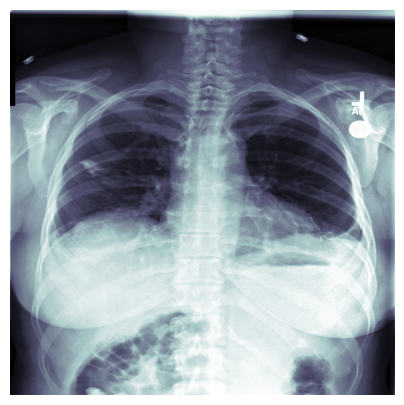

In [6]:
xray_sample.show()

In [7]:
'''transform all the dicom images into a pandas dataframe with features as columns'''
dicom_dataframe = pd.DataFrame.from_dicoms(items)
dicom_dataframe[:4]

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysicianName,SeriesDescription,...,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod,fname,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.10777.1517875225.586461,19010101,000000.00,,CR,WSD,(),view: AP,...,7,0,01,ISO_10918_1,/Users/mderri/.fastai/data/siim_small/train/Pneumothorax/000084.dcm,0,255,121.204514,59.270395,0.283138
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.13088.1517875243.537157,19010101,000000.00,,CR,WSD,(),view: PA,...,7,0,01,ISO_10918_1,/Users/mderri/.fastai/data/siim_small/train/Pneumothorax/000052.dcm,0,247,115.567468,69.569449,0.326797
2,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.10210.1517875222.631015,19010101,000000.00,,CR,WSD,(),view: PA,...,7,0,01,ISO_10918_1,/Users/mderri/.fastai/data/siim_small/train/Pneumothorax/000046.dcm,0,245,135.078695,66.805592,0.225254
3,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.556.1517875163.421242,19010101,000000.00,,CR,WSD,(),view: AP,...,7,0,01,ISO_10918_1,/Users/mderri/.fastai/data/siim_small/train/Pneumothorax/000126.dcm,0,255,121.391561,51.112038,0.169630


In [8]:
'''load the target results located in labels.csv'''
df = pd.read_csv(pneumothorax_source/f"labels.csv")
df.head()
print(df.columns)

Index(['file', 'label'], dtype='object')


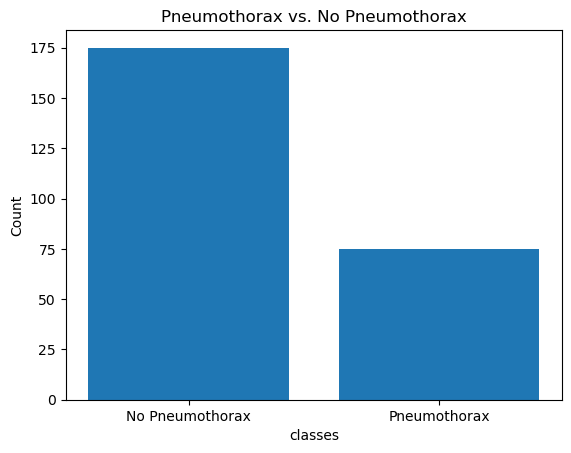

In [9]:

import matplotlib.pyplot as plt

# Count the number of images with and without pneumothorax
counts = df["label"].value_counts()

# Create a bar chart of the results
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_title("Pneumothorax vs. No Pneumothorax")
ax.set_xlabel("classes")
ax.set_ylabel("Count")
plt.show()


In [22]:
import os
os.environ['MPS_NO_WARN'] = "0"

pneumothorax = DataBlock(blocks=(ImageBlock(cls=PILDicom), CategoryBlock),
                   get_x=lambda x:pneumothorax_source/f"{x[0]}",
                   get_y=lambda x:x[1],
                   batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats, cuda=False)]
)

dls = pneumothorax.dataloaders(df.values, num_workers=0)

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


RuntimeError: The MPS backend is supported on MacOS 12.3+.Current OS version can be queried using `sw_vers`